In [664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [665]:
df = pd.read_csv('database/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='Department'>

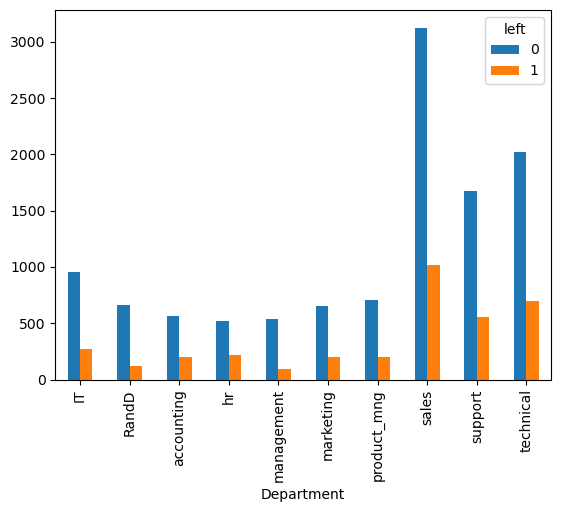

In [666]:
pd.crosstab(df['Department'], df['left']).plot(kind='bar')

In [667]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [668]:
dummy_df = pd.get_dummies(df['Department'])
df = pd.concat([df, dummy_df], axis=1).drop(['Department', 'management'], axis=1)

In [669]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [670]:
# convert categorical data to numerical data
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


<Axes: xlabel='salary'>

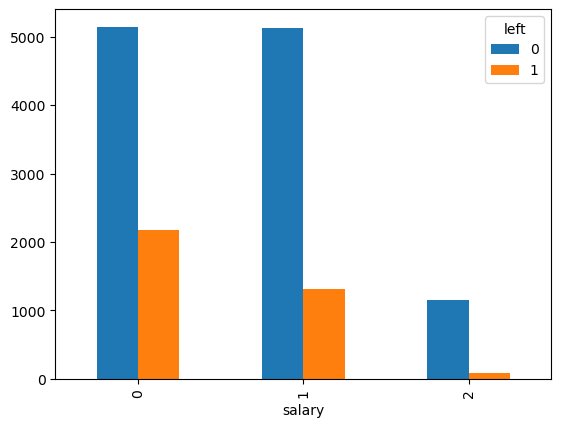

In [671]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')

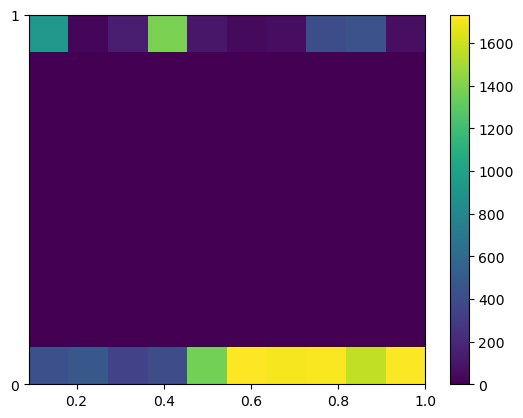

In [672]:
x_axis = df['satisfaction_level']
y_axis = df['left']
fig, ax = plt.subplots()
ax.set_yticks([0, 1])
Axes = ax.hist2d(x_axis, y_axis, bins=10)
fig.colorbar(Axes[3], ax=ax)
plt.show()

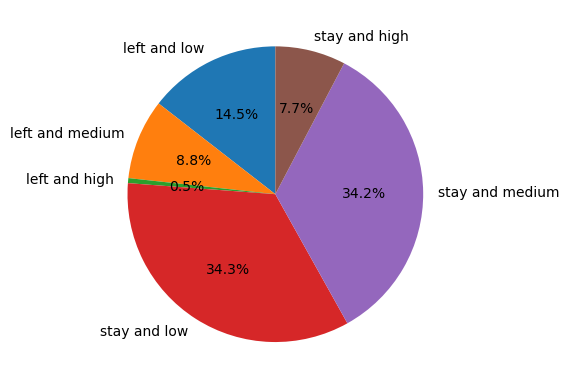

In [673]:
x_axis = df['salary']
y_axis = df['left']
labels = {
    'left and low': df[(df['left'] == 1) & (df['salary'] == 0)].shape[0],
    'left and medium': df[(df['left'] == 1) & (df['salary'] == 1)].shape[0],
    'left and high': df[(df['left'] == 1) & (df['salary'] == 2)].shape[0],
    'stay and low': df[(df['left'] == 0) & (df['salary'] == 0)].shape[0],
    'stay and medium': df[(df['left'] == 0) & (df['salary'] == 1)].shape[0],
    'stay and high': df[(df['left'] == 0) & (df['salary'] == 2)].shape[0]
}
fig, ax = plt.subplots()
ax.pie([labels[key] for key in labels.keys()], labels=labels.keys(), autopct='%1.1f%%', startangle=90)
plt.show()


(3571, 18) (11428, 18)


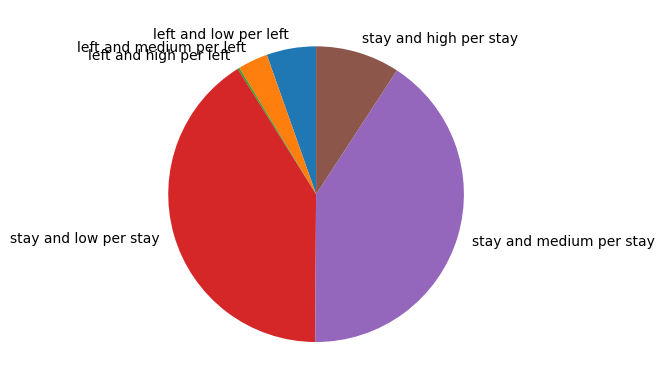

In [674]:
x_axis = df['salary']
y_axis = df['left']
left = df[df['left'] == 1]
stay = df[df['left'] == 0]
print(left.shape, stay.shape)
labels = {
    'left and low per left': left[left['salary'] == 0].shape[0] * left.shape[0],
    'left and medium per left': left[left['salary'] == 1].shape[0] * left.shape[0],
    'left and high per left': left[left['salary'] == 2].shape[0] * left.shape[0],
    'stay and low per stay': stay[stay['salary'] == 0].shape[0] * stay.shape[0],
    'stay and medium per stay': stay[stay['salary'] == 1].shape[0] * stay.shape[0],
    'stay and high per stay': stay[stay['salary'] == 2].shape[0] * stay.shape[0]
}
fig, ax = plt.subplots()
ax.pie([labels[key] for key in labels.keys()], labels=labels.keys(), startangle=90)
plt.show()


In [675]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
x = df.drop(['left'], axis=1)
y = df['left']

In [676]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1, random_state=10)
print(x_train.shape, x_test.shape)
model = LogisticRegression(solver='lbfgs', max_iter=1000, fit_intercept=True)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(13499, 17) (1500, 17)


(0.7926513075042596, 0.806)

In [677]:
model.predict_proba(x_test[:5])

array([[0.8653638 , 0.1346362 ],
       [0.60238304, 0.39761696],
       [0.57932915, 0.42067085],
       [0.95231592, 0.04768408],
       [0.84619397, 0.15380603]])

In [678]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,marketing,product_mng,sales,support,technical
left,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.650945,0.083479,0.058278,0.049265,0.045852,0.057315,0.061603,0.273539,0.146482,0.177021
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.414730,0.076449,0.033884,0.057127,0.060207,0.056847,0.055447,0.283954,0.155419,0.195183


In [679]:
#retrain model, remove unimportant features
new_df = df.drop(['last_evaluation','number_project', 'RandD', 'accounting', 'hr', 'IT', 'marketing', 'product_mng', 'sales', 'support', 'technical'], axis=1)
new_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,157,3,0,1,0,0
1,0.80,262,6,0,1,0,1
2,0.11,272,4,0,1,0,1
3,0.72,223,5,0,1,0,0
4,0.37,159,3,0,1,0,0


In [680]:
x = new_df.drop(['left'], axis=1)
y = new_df['left']
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1, random_state=10)
model = LogisticRegression(solver='lbfgs', max_iter=1000, fit_intercept=True)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7700570412623158, 0.7733333333333333)